# Remove Eye-Blinks From EEG Signal Using ICA

## Simulate EEG data with eye blinks

In [1]:
import numpy as np
import scipy.signal as sps
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
n = 1000
fs = 100
noise = 3

In [4]:
t = np.arange(n)
alpha = np.abs(np.sin(10 * t / fs)) - 0.5
alpha[n//2:] = 0
blink = np.zeros(n)
blink[n//2::200] += -1
blink = sps.lfilter(*sps.butter(2, [1*2/fs, 10*2/fs], 'bandpass'), blink)

In [5]:
frontal = blink * 200 + alpha * 10 + np.random.randn(n) * noise
central = blink * 100 + alpha * 15 + np.random.randn(n) * noise
parietal = blink * 10 + alpha * 25 + np.random.randn(n) * noise

In [6]:
eeg = np.stack([frontal, central, parietal]).T  # shape = (100, 3)

## Plot original data

Text(0, 0.5, 'original data')

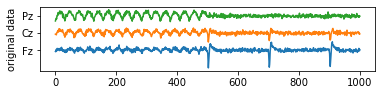

In [7]:
plt.subplot(3, 1, 1)
plt.plot(frontal + 50)
plt.plot(central + 100)
plt.plot(parietal + 150)
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('original data')

## Decompose EEG and plot components

In [8]:
ica = FastICA(n_components=3)
ica.fit(eeg)
components = ica.transform(eeg)

Text(0, 0.5, 'components')

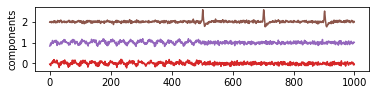

In [9]:
plt.subplot(3, 1, 2)
plt.plot([[np.nan, np.nan, np.nan]])  # advance the color cycler to give the components a different color :)
plt.plot(components + [0.5, 1.0, 1.5])
plt.yticks([0.5, 1.0, 1.5], ['0', '1', '2'])
plt.ylabel('components')

Looks like component #2 (brown) contains the eye blinks

Let's remove them (hard coded)!

In [10]:
components[:, 2] = 0

## Reconstruct EEG without blinks

In [11]:
restored = ica.inverse_transform(components)

Text(0, 0.5, 'cleaned data')

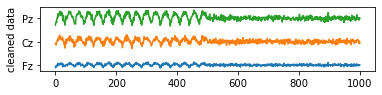

In [12]:
plt.subplot(3, 1, 3)
plt.plot(restored + [50, 100, 150])
plt.yticks([50, 100, 150], ['Fz', 'Cz', 'Pz'])
plt.ylabel('cleaned data')

## Real example

In [136]:
import pandas as pd

In [137]:
EEGData = pd.read_csv("./data/EEGData.csv", names=[
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
    'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
    'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
    'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
    'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8',
    'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
    'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
    'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8'
                                                    ])

In [138]:
EEGData1 = EEGData[['A1', 'A2', 'A3']]

In [139]:
EEGData1.head()

,A1,A2,A3
0,2394.0,4723.4,9380.7
1,2395.2,4728.3,9384.1
2,2382.6,4713.8,9380.9
3,2365.2,4692.4,9370.8
4,2358.5,4681.4,9367.4


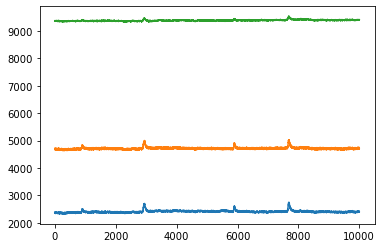

In [140]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, len(EEGData1), len(EEGData1)), EEGData1)

You need to perform the following steps:

1. feed all EEG channels into the ICA
2. manually remove the components that contain eye blinks or other artifacts
3. reconstruct using the inverse transform

Let's take a detailed look at step 2: why remove components manually? ICA does not know anything about eye blinks. It separates signals into components based on a statistical measure. If you are lucky, some of these components will look like eye blinks.

In [171]:
ica = FastICA(n_components=3)
ica.fit(EEGData1)
components = ica.transform(EEGData1)

The components that contain eye blinks:

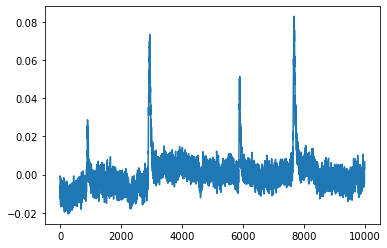

In [172]:
plt.plot(np.linspace(0, len(components), len(components)), components[:, 1])

In [173]:
components[:, 1] = 0

In [174]:
restored = ica.inverse_transform(components)

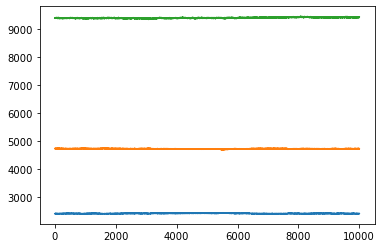

In [175]:
plt.plot(restored)